In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge

part 1

In [ ]:
covid = pd.read_csv('/content/drive/MyDrive/owid-covid-data.csv')

In [ ]:
covid.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [ ]:
russia_covid = covid.loc[(covid.location=='Russia') & (covid.date >= '2020-03-03')][['date', 'total_cases', 'new_cases']]

In [ ]:
russia_covid.reset_index(drop=True, inplace=True)

In [ ]:
russia_covid.head(10)

,date,total_cases,new_cases
0,2020-03-03,3.0,0.0
1,2020-03-04,3.0,0.0
2,2020-03-05,4.0,1.0
3,2020-03-06,13.0,9.0
4,2020-03-07,13.0,0.0
5,2020-03-08,17.0,4.0
6,2020-03-09,17.0,0.0
7,2020-03-10,20.0,3.0
8,2020-03-11,20.0,0.0
9,2020-03-12,28.0,8.0


In [ ]:
train = russia_covid.loc[0:49][['total_cases', 'new_cases']]
test = russia_covid.loc[50:][['total_cases', 'new_cases']]
print(train.new_cases.size, test.new_cases.size)

50 680


In [ ]:
train.tail()

,total_cases,new_cases
45,32008.0,4070.0
46,36793.0,4785.0
47,42853.0,6060.0
48,47121.0,4268.0
49,52763.0,5642.0


In [ ]:
test.head()

,total_cases,new_cases
50,57999.0,5236.0
51,62773.0,4774.0
52,68622.0,5849.0
53,74588.0,5966.0
54,80949.0,6361.0


part 2 \\
графики в обычной шкале

In [ ]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

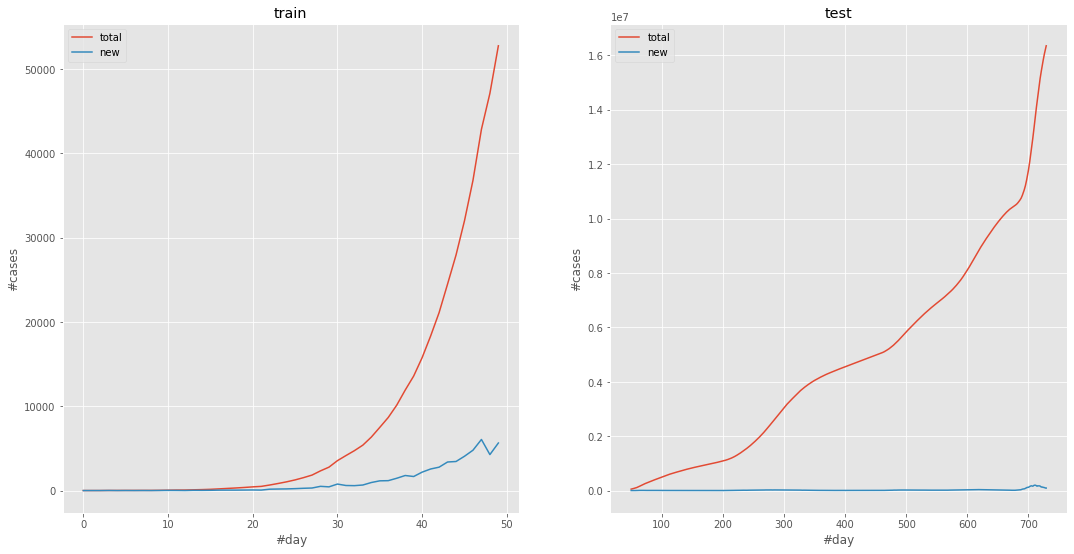

In [ ]:
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(18, 9))
ax0.plot(train.index, train.total_cases, label='total')
ax0.plot(train.index, train.new_cases, label='new')
ax1.plot(test.index, test.total_cases, label='total')
ax1.plot(test.index, test.new_cases, label='new')
ax0.legend()
ax1.legend()
ax0.set_title('train')
ax1.set_title('test')
ax0.set(xlabel='#day', ylabel='#cases')
ax1.set(xlabel='#day', ylabel='#cases')
# ax1.plot()

plt.show()

графики логарифма целевых переменных

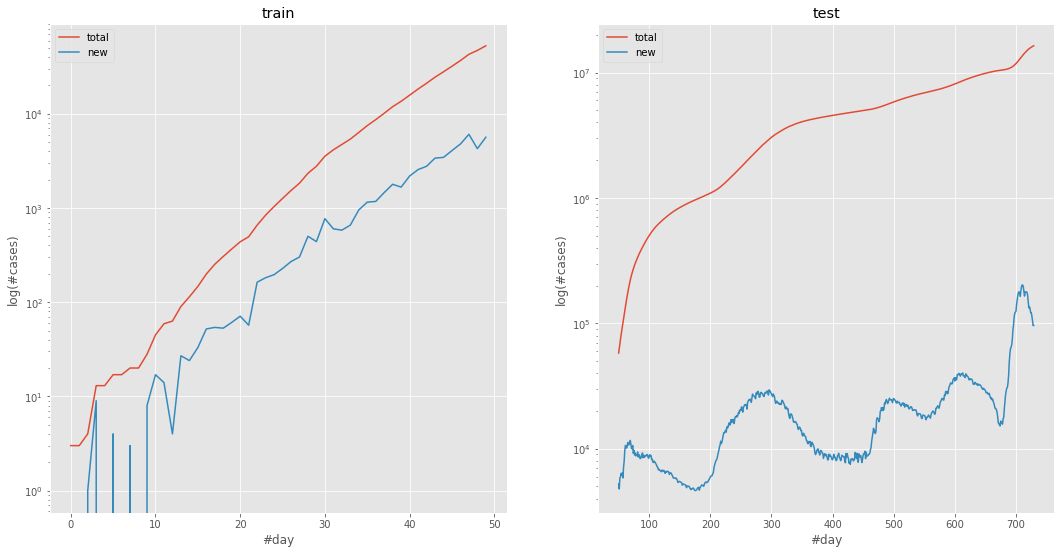

In [ ]:
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(18, 9))
ax0.semilogy(train.index, train.total_cases, label='total')
ax0.semilogy(train.index, train.new_cases, label='new')
ax1.semilogy(test.index, test.total_cases, label='total')
ax1.semilogy(test.index, test.new_cases, label='new')
ax0.legend()
ax1.legend()
ax0.set_title('train')
ax1.set_title('test')
ax0.set(xlabel='#day', ylabel='log(#cases)')
ax1.set(xlabel='#day', ylabel='log(#cases)')

plt.show()

логарифм за весь период

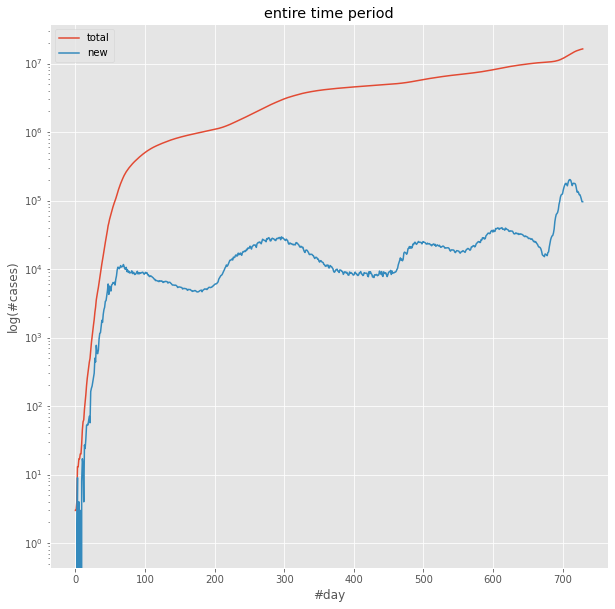

In [ ]:
plt.figure(figsize=(10,10))
plt.semilogy(russia_covid.index, russia_covid.total_cases, label='total')
plt.semilogy(russia_covid.index, russia_covid.new_cases, label='new')
plt.xlabel('#day') 
plt.ylabel('log(#cases)')
plt.title('entire time period')
plt.legend()
plt.show()

part 2.a: линейная регрессия

In [ ]:
train['log_total'] = train.total_cases.apply(np.log)
train['log_new'] = train.new_cases.apply(lambda x: np.log(x) if x > 0 else 0)
test['log_total'] = test.total_cases.apply(np.log)
test['log_new'] = test.new_cases.apply(np.log)

In [ ]:
train.head()

,total_cases,new_cases,log_total,log_new
0,3.0,0.0,1.098612,0.000000
1,3.0,0.0,1.098612,0.000000
2,4.0,1.0,1.386294,0.000000
3,13.0,9.0,2.564949,2.197225
4,13.0,0.0,2.564949,0.000000


In [ ]:
test.head()

,total_cases,new_cases,log_total,log_new
50,57999.0,5236.0,10.968181,8.563313
51,62773.0,4774.0,11.047280,8.470940
52,68622.0,5849.0,11.136368,8.674026
53,74588.0,5966.0,11.219735,8.693832
54,80949.0,6361.0,11.301575,8.757941


In [ ]:
reg_total = LinearRegression()
reg_total.fit(np.array(train.index).reshape(-1, 1), train.log_total)
print('total coefficients: ',reg_total.coef_, reg_total.intercept_)
reg_new = LinearRegression()
reg_new.fit(np.array(train.index).reshape(-1, 1), train.log_new)
print('new coefficients: ', reg_new.coef_, reg_new.intercept_)

total coefficients:  [0.19829091] 1.820737148784695
new coefficients:  [0.18596309] 0.3206875188996463


In [ ]:
russia_covid['log_total'] = russia_covid.total_cases.apply(np.log)
russia_covid['log_new'] = russia_covid.new_cases.apply(lambda x: np.log(x) if x > 0 else 0)

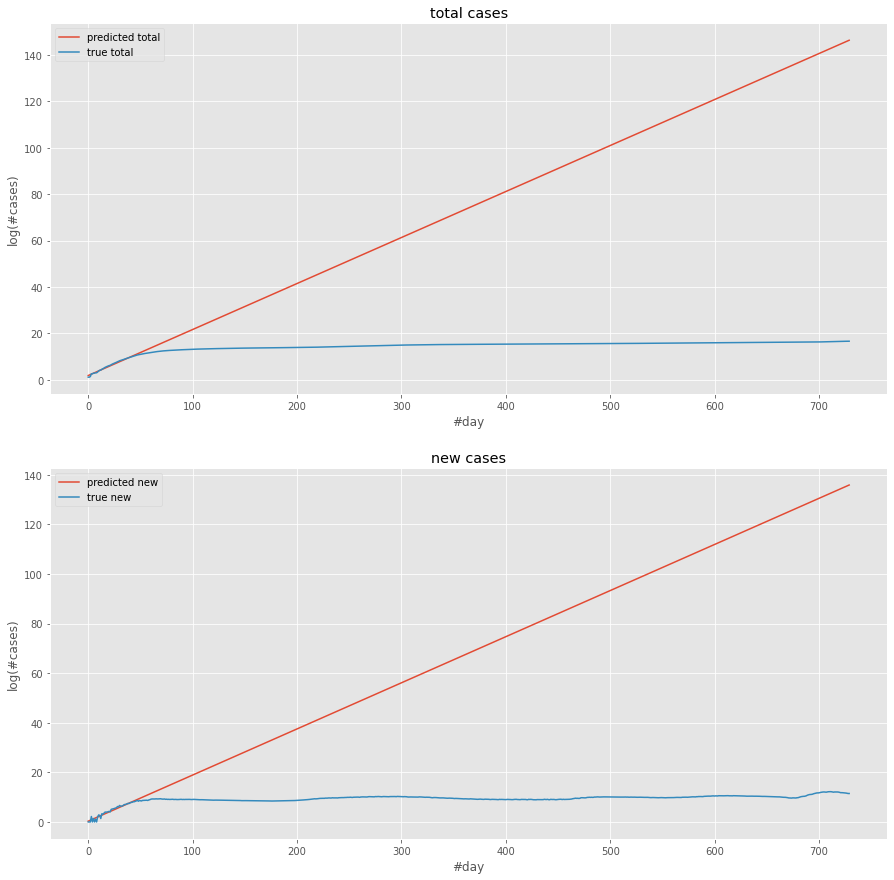

In [ ]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(15, 15))
ax0.plot(russia_covid.index, russia_covid.index * reg_total.coef_[0] + reg_total.intercept_, label='predicted total')
ax0.plot(russia_covid.index, russia_covid.log_total, label='true total')
ax0.legend()
ax0.set_title('total cases')
ax1.plot(russia_covid.index, russia_covid.index * reg_new.coef_[0] + reg_new.intercept_, label='predicted new')
ax1.plot(russia_covid.index, russia_covid.log_new, label='true new')
ax1.legend()
ax1.set_title('new cases')
ax0.set(xlabel='#day', ylabel='log(#cases)')
ax1.set(xlabel='#day', ylabel='log(#cases)')
plt.show()

In [ ]:
w_total = reg_total.coef_[0]
w0_total = reg_total.intercept_
w_new = reg_new.coef_[0]
w0_new = reg_new.intercept_

part 2.b

$ P_{Prior}(w) = N(0, I) $ - это плохой prior, тк уклон явно положительный; может быть, я найду хороший(upd: не найду) \\
$ \sigma^2_{est} = \frac{1}{n - 1}\sum_i(y_i - wx_i - w^0)^2 $ - несмещенная оценка шума \\
$mean(w_{MAP}) = w_{Ridge}: \lambda = \sigma^2_{est}  $ \\
$P(w|D) = N( w_{Ridge}, (\frac{1}{\sigma_{est}^2}X^TX + I)^{-1})  $

In [ ]:
sigma_est_total = 1 / 49 * ((train.log_total - w_total * train.index - w0_total)**2).sum()
sigma_est_new = 1 / 49 * ((train.log_new - w_new * train.index - w0_new)**2).sum()
sigma_est_total, sigma_est_new

(0.12431679749378809, 0.362560253858306)

In [ ]:
ridge_total = Ridge(alpha=sigma_est_total)
ridge_total.fit(np.array(train.index).reshape(-1, 1), train.log_total)
w_map_total = ridge_total.coef_[0]
w0_map_total = ridge_total.intercept_ 
w_map_total, w0_map_total

(0.19828854493162296, 1.8207951501891317)

In [ ]:
ridge_new = Ridge(alpha=sigma_est_new)
ridge_new.fit(np.array(train.index).reshape(-1, 1), train.log_new)
w_map_new = ridge_new.coef_[0]
w0_map_new = ridge_new.intercept_ 
w_map_new, w0_map_new

(0.18595661672921868, 0.3208461553188666)

In [ ]:
X = np.ones((50, 2))
X[:,0] = np.array(train.index)
var_total = np.linalg.inv( 1/sigma_est_total * (X.T @ X) +  np.eye(2))
var_new = np.linalg.inv(1/sigma_est_new * (X.T @ X) + np.eye(2))

part 2.c

In [ ]:
may_ind = np.array(russia_covid.loc[russia_covid.date=='2020-05-01'].index)[0]
june_ind = np.array(russia_covid.loc[russia_covid.date=='2020-06-01'].index)[0]
sept_ind = np.array(russia_covid.loc[russia_covid.date=='2020-09-01'].index)[0]

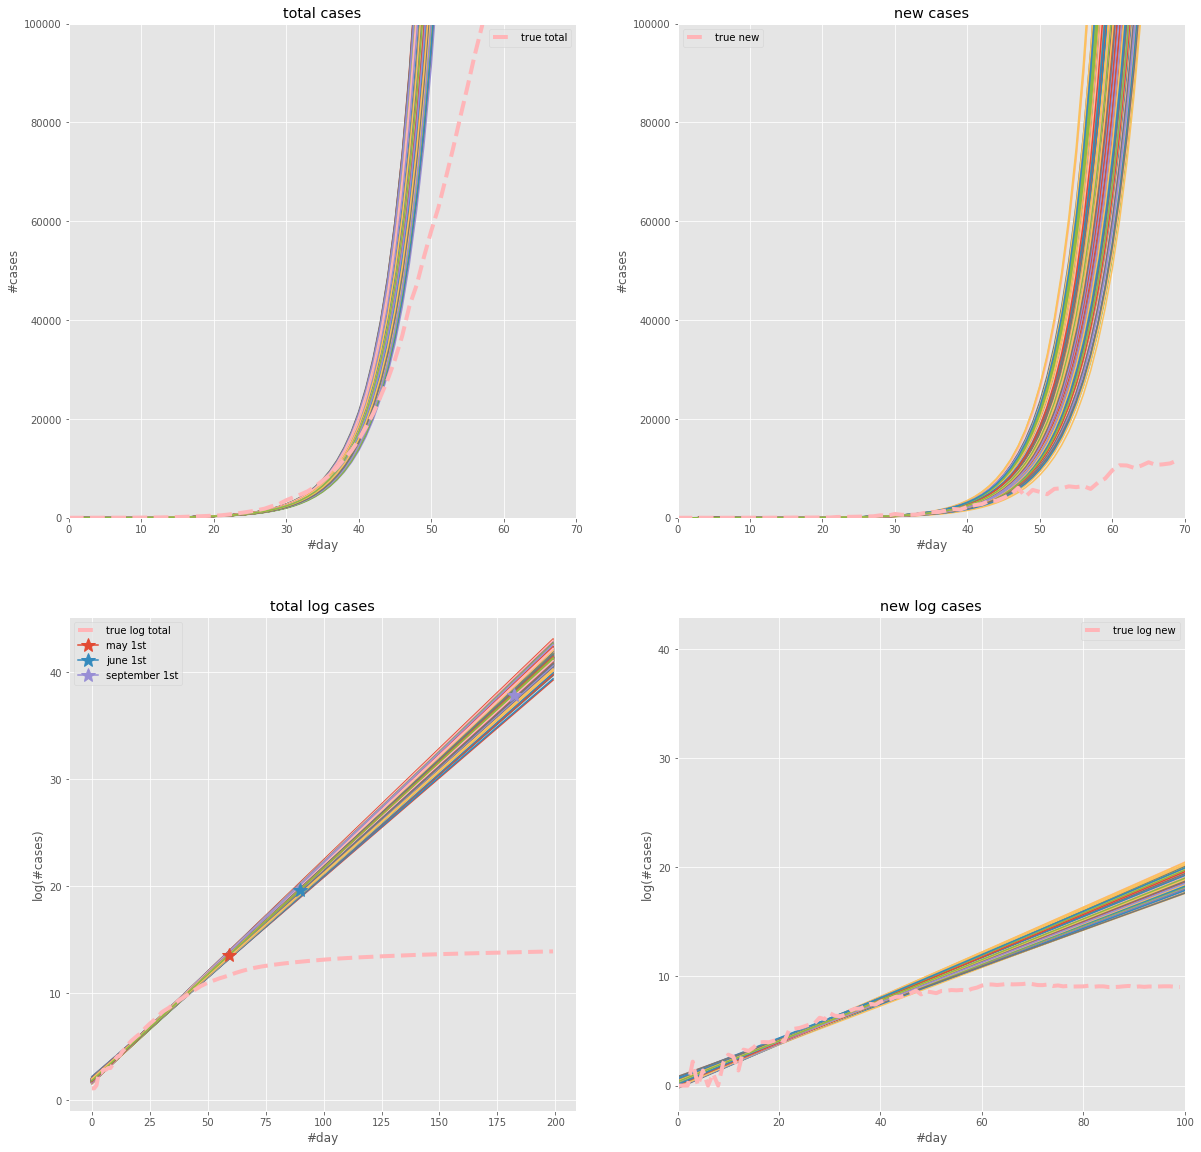

In [ ]:
samples_total = np.random.multivariate_normal([w_map_total, w0_map_total], var_total, 1000)
samples_new = np.random.multivariate_normal([w_map_new, w0_map_new], var_new, 1000)
may = np.zeros(1000)
june = np.zeros(1000)
sept = np.zeros(1000)
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(20, 20))
x = np.arange(200)
ax0.set_ylim(0, 1e5)
ax1.set_ylim(0, 1e5)
ax0.set_xlim(0, 70)
ax1.set_xlim(0, 70)
ax3.set_xlim(0, 100)
for i in range(1000):
  may[i] = may_ind * samples_total[i][0] + samples_total[i][1]
  june[i] = june_ind * samples_total[i][0] + samples_total[i][1]
  sept[i] = sept_ind * samples_total[i][0] + samples_total[i][1]
  ax0.plot(x, np.exp(x * samples_total[i][0] + samples_total[i][1]))
  ax1.plot(x, np.exp(x * samples_new[i][0] + samples_new[i][1]))
  ax2.plot(x, x * samples_total[i][0] + samples_total[i][1])
  ax3.plot(x, x * samples_new[i][0] + samples_new[i][1])

ax0.plot(x[:70], russia_covid.loc[:69].total_cases, linestyle='dashed',linewidth=4.0, label='true total')
ax1.plot(x[:70], russia_covid.loc[:69].new_cases,  linestyle='dashed',linewidth=4.0,label='true new')
ax2.plot(x, russia_covid.loc[:199].log_total,  linestyle='dashed',linewidth=4.0,label='true log total')
ax3.plot(x[:100], russia_covid.loc[:99].log_new,  linestyle='dashed',linewidth=4.0,label='true log new')
ax2.plot(may_ind, may.mean(), marker='*', label='may 1st', markersize=15.0)
ax2.plot(june_ind, june.mean(), marker='*', label='june 1st', markersize=15.0)
ax2.plot(sept_ind, sept.mean(), marker='*', label='september 1st', markersize=15.0)

ax1.set_title('new cases')
ax0.set_title('total cases')
ax3.set_title('new log cases')
ax2.set_title('total log cases')

ax0.legend()
ax1.legend()
ax2.legend()
ax3.legend()
ax0.set(xlabel='#day', ylabel='#cases')
ax1.set(xlabel='#day', ylabel='#cases')
ax2.set(xlabel='#day', ylabel='log(#cases)')
ax3.set(xlabel='#day', ylabel='log(#cases)')
plt.show()

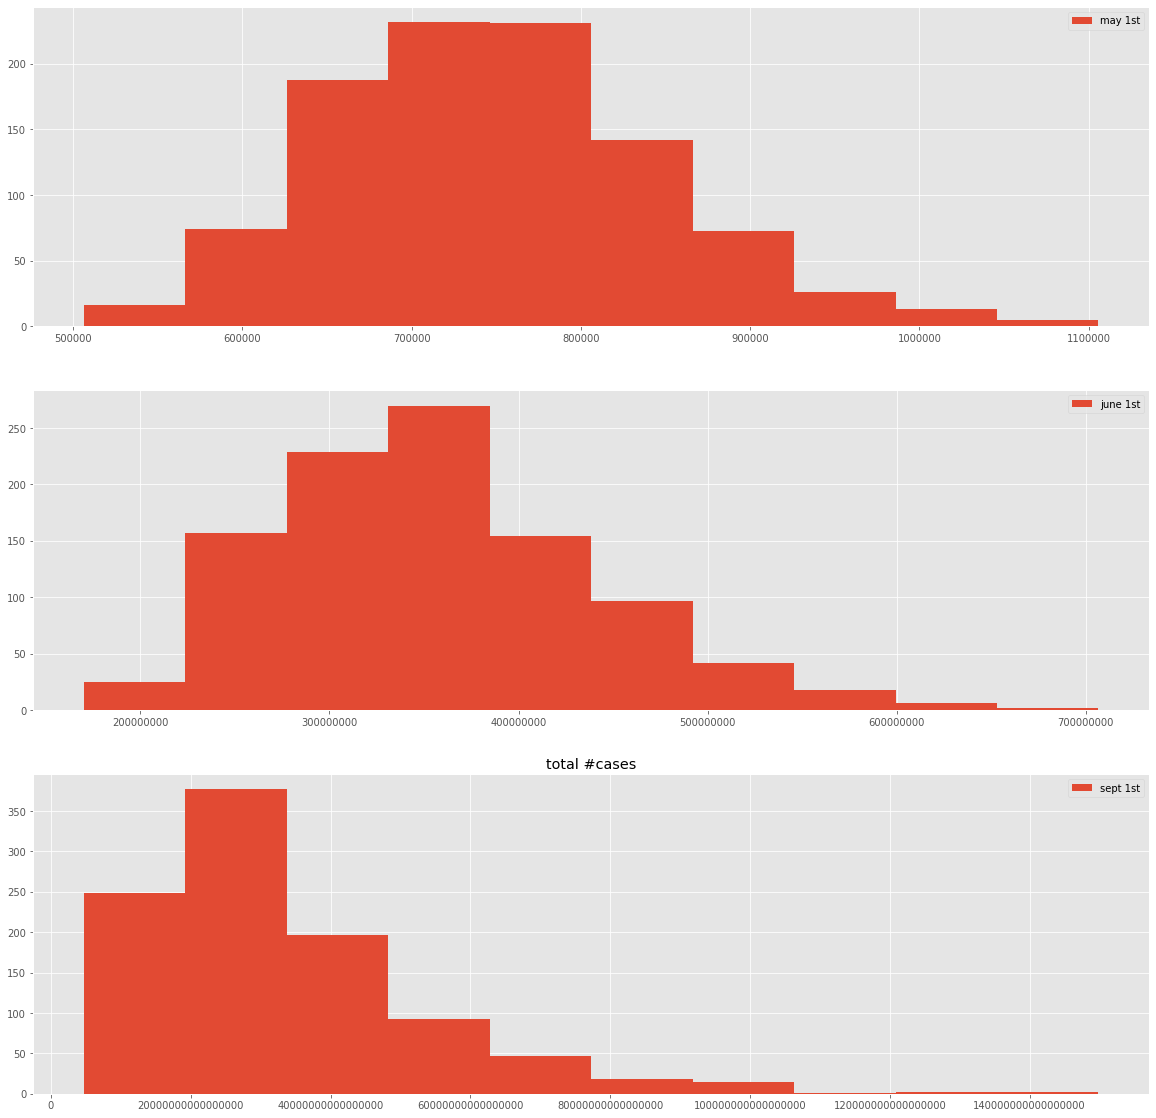

In [ ]:
fig, (ax0, ax1, ax2) = plt.subplots(3, 1 ,figsize=(20, 20))
bins = 10
ax0.hist(np.exp(may), bins=bins, label='may 1st', density=False)
ax2.hist(np.exp(sept), bins=bins, label='sept 1st',density=False)
ax1.hist(np.exp(june), bins=bins, label='june 1st',density=False)
ax0.ticklabel_format(useOffset=False, style='plain')
ax1.ticklabel_format(useOffset=False, style='plain')
ax2.ticklabel_format(useOffset=False, style='plain')
ax0.legend()
ax1.legend()
ax2.legend()
plt.title('total #cases')
plt.show()

part 3.a \\
$\Phi(x) = c_1\int_{-\infty}^x e^{-\frac{(t - \mu)^2}{2\sigma^2}}dt,  \quad c_1 = \frac{1}{\sqrt{\sigma^22\pi}}c_0 $ \\
по теореме Лагранджа: \\
$\Phi(x + 1) - \Phi(x) = \Phi'(c), \quad c \in [x, x+ 1] $,  будем считать, что $c = x$, тогда \\
$\Phi(x + 1) - \Phi(x) = New Cases(x) =: Y(x)$ \\
$Y(x) = e^{-\frac{(x - \mu)^2}{2\sigma^2} + c_2}, \quad c_1 = e^{c_2}$ \\
$ln(Y(x)) = c_2 - \frac{(x - \mu)^2}{2\sigma^2} = c_2 + \frac{-x^2 + 2x\mu - \mu^2}{2\sigma^2} = w_3 + w_2x + w_1x^2$ \\
$-\frac{1}{2w_1} = \sigma^2 $ \\
$-\frac{1}{2w_1}w_2 = \mu  $ \\
$w_3 + \frac{\mu^2}{2\sigma^2} = c_2 $ - мы нашли параметры!

part 3.b

In [ ]:
n=50
Y = russia_covid.new_cases[:n]
Y = np.where(Y>0, np.log(Y), 0)
X = np.zeros((n, 2))
X[:, 0] = np.arange(n)
X[:, 1] = np.arange(n)**2

In [ ]:
reg = LinearRegression()
reg.fit(X, Y)
reg.coef_, reg.intercept_

(array([ 0.27562283, -0.00182979]), -0.3965904028416256)

In [ ]:
w1, w2, w3 = reg.coef_[1], reg.coef_[0], reg.intercept_
sigma = -1 / (2 * w1)
mu = sigma * w2
c2 = w3 + mu**2 / (2 * sigma)
c2, mu, sigma

(9.982731795734516, 75.31540204360009, 273.2553087988382)

In [ ]:
c0 = np.exp(c2)*np.sqrt(2*np.pi*sigma)
c0

897056.0333136409

In [ ]:
from scipy.stats import norm

In [ ]:
m=russia_covid.date.size
y_pred = norm.cdf(np.arange(0, m), loc=mu, scale=np.sqrt(sigma)) * c0

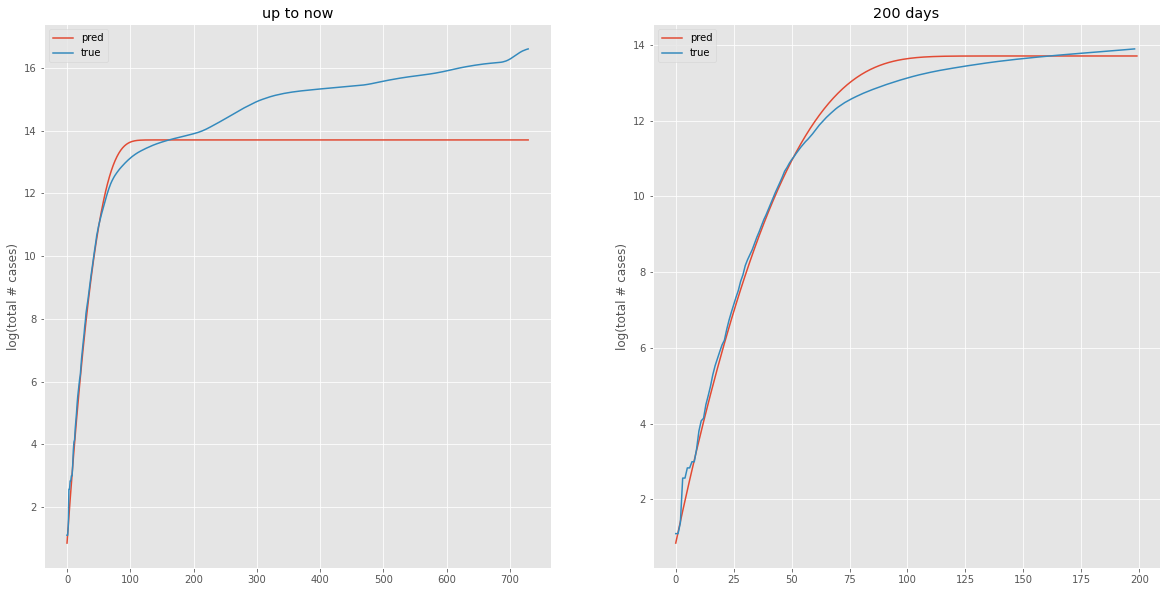

In [ ]:
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(20, 10))
ax0.plot(np.arange(0, m), np.log(y_pred), label='pred')
ax0.plot(russia_covid.index[:m], russia_covid.log_total[:m], label='true')
ax0.set(ylabel='log(total # cases)')
ax0.set_title('up to now')
ax0.legend()

ax1.plot(np.arange(0, 200), np.log(y_pred)[:200], label='pred')
ax1.plot(russia_covid.index[:199], russia_covid.log_total[:199], label='true')
ax1.set(ylabel='log(total # cases)')
ax1.set_title('200 days')
ax1.legend()
plt.show()

In [ ]:
sigma_est = 1 / 49 * ((train.log_total- np.log(y_pred[:50]))**2).sum()
sigma_est

0.0580663460777425

In [ ]:
ridge = Ridge(alpha=sigma_est)
ridge.fit(X, Y)
w1map, w2map, w3map = ridge.coef_[1], ridge.coef_[0], ridge.intercept_
sigmamap = -1 / (2 * w1map)
mumap = sigmamap * w2map
c2map = w3map + mumap**2 / (2 * sigmamap)
c0map = np.exp(c2map)*np.sqrt(2*np.pi*sigmamap)
c0map, mumap, sigmamap

(273.32292076187895, 75.32755530164744, 9.98372850446484)

part 3.c

In [ ]:
X = np.ones((50, 3))
X[:,0] = np.array(train.index)**2
X[:,1] = np.array(train.index)
var = np.linalg.inv( 1/sigma_est * (X.T @ X) +  np.eye(3))
samples = np.random.multivariate_normal([w1map, w2map, w3map], var, 1000)
mu = np.zeros(1000)
sigma = np.zeros(1000)
c = np.zeros(1000)
for i in range(1000):
  w1, w2, w3 = samples[i][0], samples[i][1], samples[i][2]
  sigma[i] = -1 / (2 * w1)
  mu[i] = sigma[i] * w2
  c2 = w3 + mu[i]**2 / (2 * sigma[i])
  c[i] = np.exp(c2)*np.sqrt(2*np.pi*sigma[i])

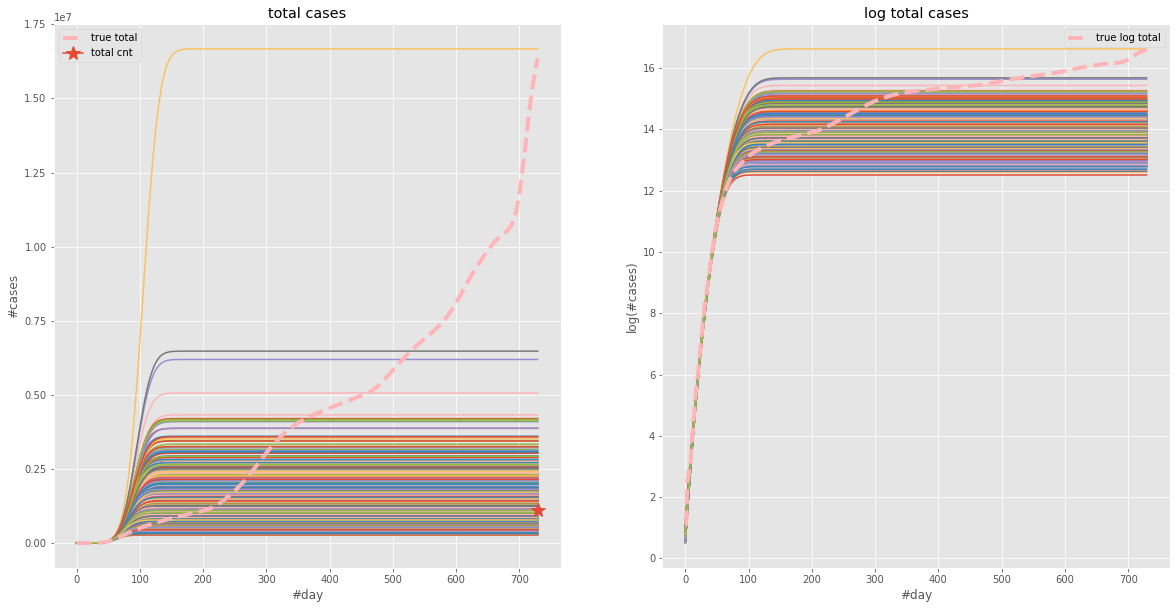

In [ ]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 10))
cnt_total = np.zeros(1000)
m=russia_covid.date.size
x = np.arange(m)

for i in range(1000):
  y_pred = norm.cdf(x, loc=mu[i], scale=np.sqrt(sigma[i])) * c[i]
  cnt_total[i] = y_pred[-1]
  ax0.plot(x, y_pred)
  ax1.plot(x, np.log(y_pred))
  
ax0.plot(x, russia_covid.total_cases, linestyle='dashed',linewidth=4.0, label='true total')
ax1.plot(x, russia_covid.log_total,  linestyle='dashed',linewidth=4.0,label='true log total')
ax0.plot(x[-1], cnt_total.mean(), marker='*', label='total cnt', markersize=15.0)

ax1.set_title('log total cases')
ax0.set_title('total cases')

ax0.legend()
ax1.legend()

ax0.set(xlabel='#day', ylabel='#cases')
ax1.set(xlabel='#day', ylabel='log(#cases)')

plt.show()

всего случаев в россии: можно было бы анализировать приращения сигмоид, но по ним и так понятно, что они быстро насытились, поэтому просто считаю распределение для последнего дня в датасете

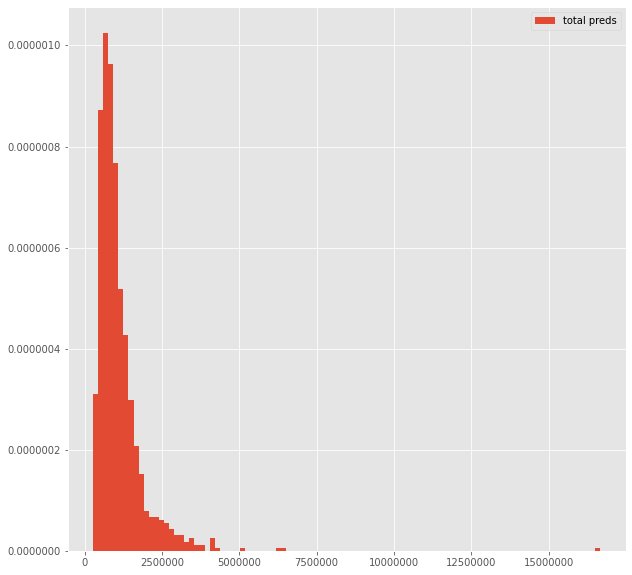

In [ ]:
bins=100
plt.figure(figsize=(10,10))
plt.hist(cnt_total, bins=bins, label='total preds', density=True)
plt.ticklabel_format(useOffset=False, style='plain')
plt.legend()
plt.show()

In [ ]:
ord_rank90 = 90 * 1000 // 100 
ord_rank10 = 10 * 1000 // 100
total_sort = np.sort(cnt_total)
percentile90 = total_sort[ord_rank90]
percentile10 = total_sort[ord_rank10]
percentile90, percentile10

(1862071.079555279, 503343.25007803214)